In [1]:
import numpy as np
import pandas as pd
import os
from timeit import default_timer as timer

base="../../data/clean/"
pd.set_option('display.max_rows', 150)

In [2]:
targets = pd.read_csv(base+"filtered_nonlog_target.csv").iloc[:,1:]
targets

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
1,Armidale Regional,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
2,Ballina,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891
3,Bathurst Regional,438.7931,462.3841,686.4989,200.5237,1184.2695,226.4738
4,Bayside,315.9874,274.1388,728.4085,85.5167,584.6676,108.5638
5,Bega Valley,312.2606,341.7192,318.1524,153.1845,810.1102,153.1845
6,Bellingen,279.2213,263.7090,248.1967,116.3422,604.9794,93.0738
7,Berrigan,174.9883,139.9907,163.3224,81.6612,699.9533,279.9813
8,Blacktown,594.3767,453.1188,821.0799,163.9858,980.7504,148.7380
9,Bland,348.2010,315.0390,281.8770,215.5530,746.1449,381.3630


In [3]:
crimes = targets.columns[1:]
crimes

Index(['Assault - domestic violence', 'Assault - non-domestic violence',
       'Fraud', 'Sexual Offences', 'Malicious damage to property',
       'Prohibited weapons offences'],
      dtype='object')

In [4]:
mnb_preds=pd.read_csv(os.path.join(base, 'tfidf_by_lga_and_time_of_day_2016_mnb_preds.csv'))
mnb_preds

,LGA,MNB Assault - domestic violence,MNB Assault - non-domestic violence,MNB Fraud,MNB Sexual Offences,MNB Malicious damage to property,MNB Prohibited weapons offences,Assault - domestic violence,Assault - domestic violence Prediction,Assault - domestic violence P0,...,Malicious damage to property P2,Malicious damage to property P3,Malicious damage to property P4,Prohibited weapons offences,Prohibited weapons offences Prediction,Prohibited weapons offences P0,Prohibited weapons offences P1,Prohibited weapons offences P2,Prohibited weapons offences P3,Prohibited weapons offences P4
0,Albury,287.756257,375.195975,750.631303,214.812874,616.319615,140.929439,3.0,0.0,5.532135e-01,...,1.403395e-01,0.031114,2.200673e-03,3.0,1.0,4.482283e-01,5.051261e-01,4.516627e-02,6.627311e-04,8.166091e-04
1,Armidale Regional,591.106064,483.687825,313.843842,208.888189,849.286931,176.887278,3.0,3.0,8.098971e-02,...,1.511106e-01,0.477855,4.820298e-02,3.0,2.0,2.148488e-03,2.928207e-01,5.258270e-01,1.546297e-01,2.457410e-02
2,Ballina,253.469309,461.089265,475.454678,165.707861,746.445565,193.670263,1.0,1.0,1.009951e-01,...,6.656178e-01,0.095054,9.985665e-03,1.0,1.0,3.846473e-03,6.592700e-01,2.998766e-01,3.697484e-02,3.205859e-05
3,Bathurst Regional,520.208428,423.565384,342.891136,216.393852,1169.521138,470.949963,2.0,1.0,9.904211e-02,...,5.264296e-01,0.049291,3.539722e-01,2.0,4.0,1.333122e-01,1.967251e-01,1.414344e-01,7.032634e-02,4.582020e-01
4,Bayside,221.948455,480.485338,926.269657,84.058772,479.648665,104.582772,1.0,0.0,8.904792e-01,...,3.021198e-03,0.027901,1.485363e-03,0.0,0.0,8.515769e-01,1.414592e-01,2.319313e-03,4.589291e-03,5.535136e-05
5,Bega Valley,423.121217,523.649948,534.631894,198.920730,929.188372,274.417125,1.0,2.0,1.928302e-01,...,4.245932e-01,0.041665,1.992280e-01,1.0,2.0,1.770298e-02,5.027143e-01,1.201882e-01,3.522165e-01,7.178023e-03
6,Bellingen,569.349366,640.731073,386.863104,200.470749,1384.161491,319.608130,1.0,4.0,1.010695e-03,...,2.614451e-01,0.099027,4.632715e-01,0.0,3.0,8.053980e-06,6.007470e-03,1.775775e-01,6.923657e-01,1.240413e-01
7,Berrigan,457.463682,355.627343,432.494354,295.537420,1010.554042,233.363865,0.0,3.0,1.550888e-02,...,3.878676e-01,0.470025,1.770265e-02,3.0,2.0,6.893266e-04,7.322627e-02,8.035910e-01,3.517952e-02,8.731387e-02
8,Blacktown,409.313514,480.984702,608.002138,179.019828,795.814044,182.931718,3.0,0.0,5.437662e-01,...,5.588450e-02,0.087920,2.132033e-02,1.0,0.5,4.043578e-01,5.295657e-01,3.420656e-02,3.002417e-02,1.845798e-03
9,Bland,908.102117,380.410980,480.072529,218.891483,1205.829286,456.609463,2.0,4.0,2.711134e-03,...,1.204835e-02,0.021426,9.350392e-01,4.0,4.0,3.791014e-06,3.097930e-04,3.834870e-04,1.779193e-01,8.213836e-01


In [8]:
pcols = ['LGA'] + [crime+' P'+str(i) for i in np.arange(5) for crime in crimes]
mnb_preds = mnb_preds[pcols]
mnb_preds

,LGA,Assault - domestic violence P0,Assault - non-domestic violence P0,Fraud P0,Sexual Offences P0,Malicious damage to property P0,Prohibited weapons offences P0,Assault - domestic violence P1,Assault - non-domestic violence P1,Fraud P1,...,Fraud P3,Sexual Offences P3,Malicious damage to property P3,Prohibited weapons offences P3,Assault - domestic violence P4,Assault - non-domestic violence P4,Fraud P4,Sexual Offences P4,Malicious damage to property P4,Prohibited weapons offences P4
0,Albury,5.532135e-01,1.704316e-01,9.602361e-04,3.198834e-01,6.169922e-01,4.482283e-01,3.511020e-01,7.828961e-01,3.012703e-03,...,0.008144,6.898057e-04,0.031114,6.627311e-04,1.933890e-03,3.398009e-02,9.866493e-01,1.017087e-03,2.200673e-03,8.166091e-04
1,Armidale Regional,8.098971e-02,1.237065e-01,1.389050e-01,2.020708e-02,9.083320e-03,2.148488e-03,2.912838e-01,2.791607e-01,4.148207e-01,...,0.309404,3.611239e-01,0.477855,1.546297e-01,6.710677e-02,7.051423e-02,7.287584e-02,2.146989e-01,4.820298e-02,2.457410e-02
2,Ballina,1.009951e-01,1.190148e-01,7.319609e-03,9.254358e-03,2.316001e-02,3.846473e-03,8.217624e-01,2.379798e-01,1.127538e-02,...,0.493729,5.602793e-03,0.095054,3.697484e-02,2.736945e-03,5.196446e-01,4.728600e-01,9.762424e-03,9.985665e-03,3.205859e-05
3,Bathurst Regional,9.904211e-02,2.418860e-02,2.227198e-02,1.836636e-01,6.606033e-02,1.333122e-01,4.794316e-01,4.633184e-01,3.680317e-01,...,0.027521,1.603154e-01,0.049291,7.032634e-02,1.266126e-01,4.214286e-01,5.713140e-01,2.942027e-01,3.539722e-01,4.582020e-01
4,Bayside,8.904792e-01,9.894927e-02,6.463587e-05,8.908365e-01,9.475057e-01,8.515769e-01,2.480783e-02,7.897191e-01,5.430068e-05,...,0.015286,2.329523e-03,0.027901,4.589291e-03,9.336798e-04,5.053815e-02,9.839088e-01,1.714223e-04,1.485363e-03,5.535136e-05
5,Bega Valley,1.928302e-01,1.307660e-01,1.925508e-01,1.161559e-02,1.429112e-01,1.770298e-02,2.674333e-01,2.212067e-01,4.559523e-01,...,0.141131,1.732997e-01,0.041665,3.522165e-01,4.817131e-02,9.687433e-02,4.613169e-02,3.307386e-02,1.992280e-01,7.178023e-03
6,Bellingen,1.010695e-03,7.983867e-03,7.460326e-02,3.178384e-05,5.483242e-04,8.053980e-06,9.682614e-02,2.486401e-02,7.291893e-01,...,0.002549,2.756882e-01,0.099027,6.923657e-01,6.006980e-01,1.929902e-02,2.998828e-05,5.715027e-01,4.632715e-01,1.240413e-01
7,Berrigan,1.550888e-02,7.846535e-03,3.862935e-02,1.637714e-02,1.454098e-03,6.893266e-04,8.807872e-02,2.137249e-01,3.212879e-01,...,0.453547,8.262934e-01,0.470025,3.517952e-02,3.251400e-02,2.589798e-01,6.216954e-03,8.116421e-02,1.770265e-02,8.731387e-02
8,Blacktown,5.437662e-01,1.433577e-01,4.325920e-03,4.210782e-01,4.823772e-01,4.043578e-01,2.358275e-01,6.642839e-01,1.607688e-02,...,0.306295,1.921774e-02,0.087920,3.002417e-02,1.818083e-02,9.349534e-02,6.508987e-01,9.092460e-03,2.132033e-02,1.845798e-03
9,Bland,2.711134e-03,9.991596e-03,1.532904e-01,2.374103e-04,1.643740e-05,3.791014e-06,9.371778e-04,8.062205e-04,8.241910e-01,...,0.000828,2.864916e-01,0.021426,1.779193e-01,9.564459e-01,7.594171e-01,1.430818e-05,6.399101e-01,9.350392e-01,8.213836e-01


In [9]:
opal_preds = pd.read_csv(os.path.join(base, 'opal_predictions.csv'))
opal_preds = targets[['LGA']].merge(opal_preds,left_on='LGA',right_on='lga',how='left')
opal_cols = opal_preds.columns[-6:].tolist()
new_cols = ['Opal ' + name[:-6] for name in opal_cols]
opal_preds = opal_preds[['LGA']+opal_cols]
opal_preds.columns = ['LGA'] + new_cols
opal_preds = opal_preds.fillna(opal_preds.median())
opal_preds

,LGA,Opal Assault - domestic violence,Opal Assault - non-domestic violence,Opal Fraud,Opal Sexual Offences,Opal Malicious damage to property,Opal Prohibited weapons offences
0,Albury,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
1,Armidale Regional,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
2,Ballina,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
3,Bathurst Regional,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
4,Bayside,240.04683,251.44485,957.07532,118.53787,669.48002,102.41664
5,Bega Valley,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
6,Bellingen,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
7,Berrigan,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
8,Blacktown,448.68270,369.00774,765.48802,111.35508,601.79515,150.18557
9,Bland,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378


In [10]:
derived = pd.read_csv(os.path.join(base, 'twitter_17_features.csv'))
derived = derived.rename(columns={'lga': 'LGA'})
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_ptweet,Polr_Neg_N_ptweet,Polr_Neg_E_ptweet,Polr_Neg_M_ptweet,Night_pcapita,Morning_pcapita,Afternoon_pcapita,Evening_pcapita,Prof_exists_pcapita,tr_tweeters,ja_tweeters,in_tweeters,tl_tweeters
0,Woollahra,0.000000,0.001180,348,0.621871,-0.023966,-0.033575,-0.026190,-0.033724,0.017662,0.024631,0.015431,0.012242,0.000922,1,0,2,3
1,Camden,0.376190,0.000575,210,0.861029,-0.029580,-0.026253,-0.025182,-0.014432,0.005127,0.006968,0.002007,0.003286,0.000102,0,2,0,1
2,Albury,0.339355,0.006304,775,0.316016,-0.058177,-0.057558,-0.053385,-0.053010,0.128044,0.152263,0.045873,0.083836,0.024101,4,3,26,29
3,North Sydney,0.021667,0.002468,600,0.271039,-0.052205,-0.045564,-0.046517,-0.049899,0.032162,0.064102,0.004818,0.021505,0.003326,1,3,11,13
4,Central Coast,0.423130,0.004034,3597,0.415482,-0.046644,-0.041427,-0.038655,-0.047701,0.063624,0.091702,0.030927,0.045790,0.007695,25,13,89,129
5,Fairfield,0.108527,0.000121,129,0.685430,-0.084061,-0.022593,-0.026363,-0.031932,0.000679,0.000503,0.000070,0.000267,0.000030,1,0,1,0
6,Temora,0.239130,0.002946,46,0.714286,-0.035714,-0.046078,-0.021142,-0.035563,0.008347,0.008183,0.001146,0.002946,0.000000,0,0,1,0
7,Cobar,0.354167,0.002798,48,0.779412,-0.033369,-0.005390,-0.032429,-0.032567,0.018076,0.035076,0.016785,0.017861,0.000646,0,0,2,0
8,Lithgow,0.599415,0.003035,342,0.577253,-0.120640,-0.044516,-0.051436,-0.044959,0.080322,0.083784,0.025699,0.036984,0.011996,2,1,5,7
9,Glen Innes Severn,0.477612,0.001245,67,0.554392,-0.029056,-0.023926,-0.015134,-0.053456,0.065980,0.082390,0.019466,0.026709,0.003508,1,0,1,2


In [11]:
derived_features = derived.columns[1:]
derived = derived.merge(mnb_preds, on='LGA')
derived = derived.sort_values(by=['LGA'])
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_ptweet,Polr_Neg_N_ptweet,Polr_Neg_E_ptweet,Polr_Neg_M_ptweet,Night_pcapita,...,Fraud P3,Sexual Offences P3,Malicious damage to property P3,Prohibited weapons offences P3,Assault - domestic violence P4,Assault - non-domestic violence P4,Fraud P4,Sexual Offences P4,Malicious damage to property P4,Prohibited weapons offences P4
2,Albury,0.339355,0.006304,775,0.316016,-0.058177,-0.057558,-0.053385,-0.053010,0.128044,...,0.008144,6.898057e-04,0.031114,6.627311e-04,1.933890e-03,3.398009e-02,9.866493e-01,1.017087e-03,2.200673e-03,8.166091e-04
108,Armidale Regional,0.375817,0.003362,306,0.514424,-0.055108,-0.031328,-0.032230,-0.052526,0.062039,...,0.309404,3.611239e-01,0.477855,1.546297e-01,6.710677e-02,7.051423e-02,7.287584e-02,2.146989e-01,4.820298e-02,2.457410e-02
99,Ballina,0.594556,0.003853,698,0.550613,-0.044911,-0.028317,-0.028855,-0.034108,0.040608,...,0.493729,5.602793e-03,0.095054,3.697484e-02,2.736945e-03,5.196446e-01,4.728600e-01,9.762424e-03,9.985665e-03,3.205859e-05
56,Bathurst Regional,0.476974,0.004383,608,0.444390,-0.052977,-0.050872,-0.047609,-0.068169,0.047240,...,0.027521,1.603154e-01,0.049291,7.032634e-02,1.266126e-01,4.214286e-01,5.713140e-01,2.942027e-01,3.539722e-01,4.582020e-01
85,Bayside,0.042857,0.001538,770,0.265229,-0.075598,-0.050517,-0.046830,-0.050722,0.009817,...,0.015286,2.329523e-03,0.027901,4.589291e-03,9.336798e-04,5.053815e-02,9.839088e-01,1.714223e-04,1.485363e-03,5.535136e-05
93,Bega Valley,0.482255,0.004511,479,0.607501,-0.034405,-0.029967,-0.037206,-0.039107,0.046492,...,0.141131,1.732997e-01,0.041665,3.522165e-01,4.817131e-02,9.687433e-02,4.613169e-02,3.307386e-02,1.992280e-01,7.178023e-03
44,Bellingen,0.556122,0.003237,196,0.838773,-0.021720,-0.020343,-0.030741,-0.027155,0.040654,...,0.002549,2.756882e-01,0.099027,6.923657e-01,6.006980e-01,1.929902e-02,2.998828e-05,5.715027e-01,4.632715e-01,1.240413e-01
55,Berrigan,0.362745,0.003663,102,0.349639,-0.038052,-0.046724,-0.028920,-0.048967,0.047034,...,0.453547,8.262934e-01,0.470025,3.517952e-02,3.251400e-02,2.589798e-01,6.216954e-03,8.116421e-02,1.770265e-02,8.731387e-02
100,Blacktown,0.060345,0.000258,348,0.380935,-0.039068,-0.023631,-0.030796,-0.046748,0.002181,...,0.306295,1.921774e-02,0.087920,3.002417e-02,1.818083e-02,9.349534e-02,6.508987e-01,9.092460e-03,2.132033e-02,1.845798e-03
42,Bland,0.258065,0.001511,31,0.812766,-0.102734,-0.096352,-0.105637,-0.107463,0.013266,...,0.000828,2.864916e-01,0.021426,1.779193e-01,9.564459e-01,7.594171e-01,1.430818e-05,6.399101e-01,9.350392e-01,8.213836e-01


In [12]:
derived = derived.merge(opal_preds, on='LGA')
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_ptweet,Polr_Neg_N_ptweet,Polr_Neg_E_ptweet,Polr_Neg_M_ptweet,Night_pcapita,...,Fraud P4,Sexual Offences P4,Malicious damage to property P4,Prohibited weapons offences P4,Opal Assault - domestic violence,Opal Assault - non-domestic violence,Opal Fraud,Opal Sexual Offences,Opal Malicious damage to property,Opal Prohibited weapons offences
0,Albury,0.339355,0.006304,775,0.316016,-0.058177,-0.057558,-0.053385,-0.053010,0.128044,...,9.866493e-01,1.017087e-03,2.200673e-03,8.166091e-04,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
1,Armidale Regional,0.375817,0.003362,306,0.514424,-0.055108,-0.031328,-0.032230,-0.052526,0.062039,...,7.287584e-02,2.146989e-01,4.820298e-02,2.457410e-02,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
2,Ballina,0.594556,0.003853,698,0.550613,-0.044911,-0.028317,-0.028855,-0.034108,0.040608,...,4.728600e-01,9.762424e-03,9.985665e-03,3.205859e-05,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
3,Bathurst Regional,0.476974,0.004383,608,0.444390,-0.052977,-0.050872,-0.047609,-0.068169,0.047240,...,5.713140e-01,2.942027e-01,3.539722e-01,4.582020e-01,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
4,Bayside,0.042857,0.001538,770,0.265229,-0.075598,-0.050517,-0.046830,-0.050722,0.009817,...,9.839088e-01,1.714223e-04,1.485363e-03,5.535136e-05,240.04683,251.44485,957.07532,118.53787,669.48002,102.41664
5,Bega Valley,0.482255,0.004511,479,0.607501,-0.034405,-0.029967,-0.037206,-0.039107,0.046492,...,4.613169e-02,3.307386e-02,1.992280e-01,7.178023e-03,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
6,Bellingen,0.556122,0.003237,196,0.838773,-0.021720,-0.020343,-0.030741,-0.027155,0.040654,...,2.998828e-05,5.715027e-01,4.632715e-01,1.240413e-01,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
7,Berrigan,0.362745,0.003663,102,0.349639,-0.038052,-0.046724,-0.028920,-0.048967,0.047034,...,6.216954e-03,8.116421e-02,1.770265e-02,8.731387e-02,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378
8,Blacktown,0.060345,0.000258,348,0.380935,-0.039068,-0.023631,-0.030796,-0.046748,0.002181,...,6.508987e-01,9.092460e-03,2.132033e-02,1.845798e-03,448.68270,369.00774,765.48802,111.35508,601.79515,150.18557
9,Bland,0.258065,0.001511,31,0.812766,-0.102734,-0.096352,-0.105637,-0.107463,0.013266,...,1.430818e-05,6.399101e-01,9.350392e-01,8.213836e-01,268.09121,290.35682,667.46089,111.35508,565.22550,108.66378


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

all_features = pd.read_csv(os.path.join(base, 'baseline_12_features.csv'))
all_features = all_features.rename(columns={'lga': 'LGA'})
demog_features = all_features.columns[0:-1]
print(demog_features)
all_features = derived.merge(all_features, on='LGA')
all_features = all_features.sort_values(by=['LGA'])
# SCALE:
all_features[all_features.columns[1:]] = scaler.fit_transform(all_features[all_features.columns[1:]])
print(all_features.columns)
all_features

Index(['Percent_Unem_loyment_P_G40', 'Median_age_persons_G02',
       'Median_mortgage_repay_monthly_G02', 'Median_rent_weekly_G02',
       'Median_tot_hhd_inc_weekly_G02', 'Per_lone_par', 'Num_sep_males',
       'Pop_density', 'Per_no_relg', 'Per_immi', 'Per_english', 'Per_Voc'],
      dtype='object')
Index(['LGA', 'instagrammers_ratio', 'replyers_per_capita', 'total_tweeters',
       'link_tweets_ratio', 'Polr_Neg_A_ptweet', 'Polr_Neg_N_ptweet',
       'Polr_Neg_E_ptweet', 'Polr_Neg_M_ptweet', 'Night_pcapita',
       'Morning_pcapita', 'Afternoon_pcapita', 'Evening_pcapita',
       'Prof_exists_pcapita', 'tr_tweeters', 'ja_tweeters', 'in_tweeters',
       'tl_tweeters', 'Assault - domestic violence P0',
       'Assault - non-domestic violence P0', 'Fraud P0', 'Sexual Offences P0',
       'Malicious damage to property P0', 'Prohibited weapons offences P0',
       'Assault - domestic violence P1', 'Assault - non-domestic violence P1',
       'Fraud P1', 'Sexual Offences P1', 'Malicious

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_ptweet,Polr_Neg_N_ptweet,Polr_Neg_E_ptweet,Polr_Neg_M_ptweet,Night_pcapita,...,Median_mortgage_repay_monthly_G02,Median_rent_weekly_G02,Median_tot_hhd_inc_weekly_G02,Per_lone_par,Num_sep_males,Pop_density,Per_no_relg,Per_immi,Per_english,Per_Voc
0,Albury,0.466554,0.416775,0.197563,0.287275,0.729411,0.547625,0.714284,0.712753,0.462604,...,0.273878,0.209434,0.217708,0.553845,0.545986,0.021413,0.455354,0.169855,0.910412,0.882425
1,Armidale Regional,0.516683,0.218445,0.075966,0.502525,0.743688,0.767746,0.827506,0.715377,0.222867,...,0.262449,0.245283,0.211458,0.558697,0.397525,0.000425,0.453453,0.205078,0.885233,0.386698
2,Ballina,0.817410,0.251528,0.177599,0.541787,0.791112,0.793016,0.845567,0.815179,0.145025,...,0.401224,0.415094,0.202604,0.560206,0.491028,0.011047,0.535251,0.094077,0.949884,0.657809
3,Bathurst Regional,0.655755,0.287248,0.154265,0.426547,0.753595,0.603735,0.745196,0.630611,0.169113,...,0.375510,0.301887,0.282812,0.566640,0.491999,0.001375,0.311942,0.067908,0.918670,0.596823
4,Bayside,0.058921,0.095517,0.196267,0.232176,0.648384,0.606711,0.749366,0.725153,0.033190,...,0.673469,0.641509,0.447396,0.405617,0.365273,0.401445,0.258616,0.691874,0.240357,0.736324
5,Bega Valley,0.663016,0.295896,0.120819,0.603503,0.839979,0.779166,0.800873,0.788092,0.166398,...,0.242041,0.245283,0.114063,0.426294,0.667893,0.000667,0.671224,0.106005,0.956698,0.441845
6,Bellingen,0.764571,0.210004,0.047446,0.854408,0.898977,0.859929,0.835475,0.852856,0.145192,...,0.265306,0.301887,0.119792,0.720020,0.652684,0.001003,0.798436,0.118716,0.969164,0.567172
7,Berrigan,0.498711,0.238779,0.023075,0.323752,0.823015,0.638543,0.845221,0.734662,0.168365,...,0.135918,0.113208,0.104167,0.319967,0.616265,0.000513,0.324782,0.060599,0.922197,0.346292
8,Blacktown,0.082964,0.009266,0.086855,0.357704,0.818289,0.832335,0.835178,0.746689,0.005456,...,0.571429,0.490566,0.491667,0.567573,0.435003,0.180144,0.104001,0.481686,0.426974,0.598399
9,Bland,0.354794,0.093728,0.004667,0.826193,0.522169,0.222073,0.434630,0.417689,0.045718,...,0.102041,0.056604,0.173437,0.439125,0.593415,0.000076,0.072331,0.043375,0.901472,0.288869


In [14]:
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# X must be a dataframe of input variables
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
def rfr_cv(X, y, folds=5, verbose=False, random_state=2018):
    assert len(X) == len(y)

    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    kf = KFold(n_splits=folds, shuffle=True, random_state=random_state)
    for train_index, test_index in kf.split(X):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()

        model = RandomForestRegressor(random_state=random_state)
        model.fit(X_train_df, y_train_df.iloc[:,-1])

        # Save important features
        importances = model.feature_importances_
        for i in range(len(importances)):
            importants[X_train_df.columns[i]] += importances[i] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test_df)
        preds = pd.concat([preds,y_test_df])

        if verbose:
            print('Finished processing',len(preds),'records...')
    preds = preds.sort_values(by=[preds.columns[0]]).reset_index(drop=True)
    return preds, importants

In [15]:
def repeat_rfr_cv(X, y, reps=10, folds=10, random_state=2018):
    np.random.seed(random_state)
    all_preds = pd.DataFrame()
    all_importants = defaultdict(float)
    for rep in np.arange(reps):
        preds, importants = rfr_cv(X, y, folds=folds, random_state=None)
        for (k,v) in importants.items():
            all_importants[k] += v / reps
        all_preds = all_preds.append(preds)
    all_preds = all_preds.groupby("LGA").mean().reset_index()
    return all_preds, all_importants

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def metrics(predictions, importants):
    print('MOST IMPORTANT FEATURES:')
    for w in sorted(importants, key=importants.get, reverse=True)[0:20]:
      print(w, importants[w])

    y = predictions.iloc[:,-2]
    pred = predictions.iloc[:,-1]
    print('R2:',r2_score(y,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y,pred)))
    print('MAPE:',mape(y,pred))
    print('Mean APE Baseline:',mape(y,np.mean(y)))

    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()


In [43]:
# Generates mean MAPE and std deviation across 6 crime types
def mmape_score(X, y, features, folds=10, n=4):
    mmapes = np.zeros(n)
    for i in np.arange(n):
        mmape = 0
        for crime in crimes:
            X_cols = [crime+' P0' if col=='P0' else col for col in features]
            X_cols = [crime+' P1' if col=='P1' else col for col in X_cols]
            X_cols = [crime+' P2' if col=='P2' else col for col in X_cols]
            X_cols = [crime+' P3' if col=='P3' else col for col in X_cols]
            X_cols = [crime+' P4' if col=='P4' else col for col in X_cols]
            X_cols = ['Opal '+crime if col=='Opal' else col for col in X_cols]
            preds, _ = rfr_cv(X[X_cols], y[['LGA',crime]], folds=folds, verbose=False, random_state=None)
            mmape += mape(preds.iloc[:,-2], preds.iloc[:,-1])
        mmapes[i] = mmape / len(crimes)
    return np.mean(mmapes), np.std(mmapes)

In [42]:
# Generates mean MAPE and std deviation for one crime type
def score_crime(X, y, features, crime, n=10, folds=10, random_state=2018):
    np.random.seed(random_state)
    mapes = np.zeros(n)
    for i in np.arange(n):
        X_cols = [crime+' P0' if col=='P0' else col for col in features]
        X_cols = [crime+' P1' if col=='P1' else col for col in X_cols]
        X_cols = [crime+' P2' if col=='P2' else col for col in X_cols]
        X_cols = [crime+' P3' if col=='P3' else col for col in X_cols]
        X_cols = [crime+' P4' if col=='P4' else col for col in X_cols]
        X_cols = ['Opal '+crime if col=='Opal' else col for col in X_cols]
        preds, _ = repeat_rfr_cv(X[X_cols], y[['LGA',crime]], folds=folds, reps=10, random_state=None)
        mapes[i] = mape(preds.iloc[:,-2], preds.iloc[:,-1])
    return mapes

In [20]:
from scipy.stats import t

def crime_ci(crime, sample1, sample2):
    assert len(sample1) == len(sample2)
    
    tstat,p = stats.ttest_ind(sample1, sample2)

    # Calculate the 95% confidence interval
    N1 = len(sample1)
    N2 = len(sample2)
    df = (N1 + N2 - 2)
    std1 = np.std(sample1)
    std2 = np.std(sample2)
    std_N1N2 = np.sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 
    moe = t.ppf(0.975, df) * std_N1N2 * np.sqrt(1/N1 + 1/N2)

    return tstat, p, moe

Assault - domestic violence
Finished 10x10 fold cross validation in 1.4588768900139257 seconds
MOST IMPORTANT FEATURES:
Polr_Neg_N_ptweet 0.1396533992785862
instagrammers_ratio 0.11921364723699804
total_tweeters 0.08834454246660922
replyers_per_capita 0.08348507525489003
Morning_pcapita 0.071828521666497
tl_tweeters 0.06902174841928148
Polr_Neg_M_ptweet 0.05883018060818253
Prof_exists_pcapita 0.0526705078306553
Polr_Neg_E_ptweet 0.0493637233108064
Afternoon_pcapita 0.04856919267737561
Night_pcapita 0.04714727663944142
Evening_pcapita 0.04613461549394362
link_tweets_ratio 0.04377249062522786
Polr_Neg_A_ptweet 0.04274596884756249
in_tweeters 0.024100226678087634
tr_tweeters 0.007662528397529623
ja_tweeters 0.007456354568325576
R2: 0.16352873727323292
RMSE: 268.2307639182038
MAPE: 63.647142179793484
Mean APE Baseline: 72.09140356370095


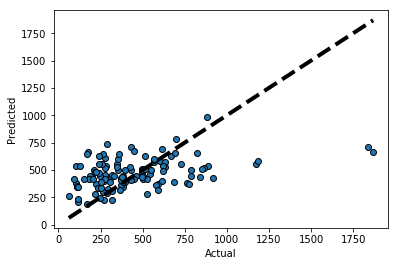

Assault - non-domestic violence
Finished 10x10 fold cross validation in 1.486819323967211 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.12694159396928187
Morning_pcapita 0.11475850404311172
instagrammers_ratio 0.09102404608854668
Afternoon_pcapita 0.08552402102802609
replyers_per_capita 0.06674391230989149
Evening_pcapita 0.06574306445478835
Night_pcapita 0.06181019775694581
Polr_Neg_N_ptweet 0.06132947408009115
ja_tweeters 0.054134725362453215
link_tweets_ratio 0.049064532302654555
tl_tweeters 0.04136338797183791
Polr_Neg_M_ptweet 0.04073966699889073
in_tweeters 0.03824199756179732
Polr_Neg_E_ptweet 0.03388218468869478
Prof_exists_pcapita 0.031156605542539136
Polr_Neg_A_ptweet 0.02885086856695458
tr_tweeters 0.008691217273494627
R2: 0.08249065621073548
RMSE: 232.8626124609413
MAPE: 53.89524441472919
Mean APE Baseline: 59.83267716016895


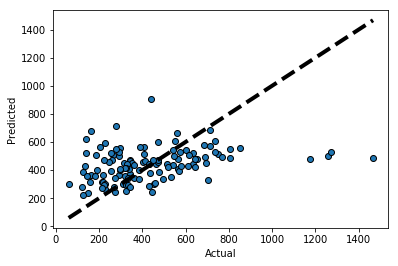

Fraud
Finished 10x10 fold cross validation in 1.504516804998275 seconds
MOST IMPORTANT FEATURES:
ja_tweeters 0.22008567655942288
total_tweeters 0.20962518694209345
instagrammers_ratio 0.16851492565383663
replyers_per_capita 0.04819796960931913
Polr_Neg_E_ptweet 0.047692575753891506
tl_tweeters 0.042790833216761054
tr_tweeters 0.040374807472547354
link_tweets_ratio 0.03741494527371684
Polr_Neg_A_ptweet 0.032765010354087104
in_tweeters 0.023442391196139584
Polr_Neg_M_ptweet 0.023338071645580088
Afternoon_pcapita 0.020958033652271398
Polr_Neg_N_ptweet 0.020757121346088613
Prof_exists_pcapita 0.018754508860911488
Morning_pcapita 0.01872698403547515
Evening_pcapita 0.013473100692562088
Night_pcapita 0.013087857735295642
R2: 0.2539231068638149
RMSE: 249.80219241830943
MAPE: 36.96080846607668
Mean APE Baseline: 50.56437861497196


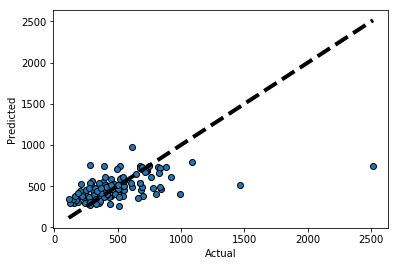

Sexual Offences
Finished 10x10 fold cross validation in 1.4276824200060219 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.20641708925442206
replyers_per_capita 0.12403749511694413
Night_pcapita 0.08921717038998594
total_tweeters 0.07379478714783147
Polr_Neg_N_ptweet 0.064151218081355
Polr_Neg_E_ptweet 0.05554992048639367
link_tweets_ratio 0.05041259961300651
Evening_pcapita 0.047844275175851006
Prof_exists_pcapita 0.04693601377758544
Morning_pcapita 0.04672592196681884
Polr_Neg_M_ptweet 0.042384167052151256
Afternoon_pcapita 0.042270855598810324
Polr_Neg_A_ptweet 0.03974696098564966
tl_tweeters 0.027000710309636772
in_tweeters 0.01872534857166548
ja_tweeters 0.012484267943227892
tr_tweeters 0.01230119852866454
R2: 0.2986599262234071
RMSE: 78.17797382004878
MAPE: 39.495228423898595
Mean APE Baseline: 53.08218065832499


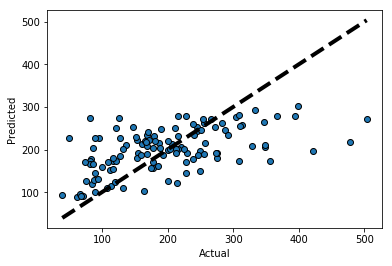

Malicious damage to property
Finished 10x10 fold cross validation in 1.5128169690142386 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.17434508606665347
Morning_pcapita 0.11078117365199863
Polr_Neg_N_ptweet 0.10931292634457307
replyers_per_capita 0.0799382916631086
Night_pcapita 0.06967245978246382
Afternoon_pcapita 0.0572577053789812
Evening_pcapita 0.05619562167097548
tl_tweeters 0.052442106306559745
total_tweeters 0.05161772061971444
Polr_Neg_M_ptweet 0.048565399867406336
link_tweets_ratio 0.045189132339812574
Polr_Neg_E_ptweet 0.04125011886202093
Prof_exists_pcapita 0.03738845733952532
Polr_Neg_A_ptweet 0.030229400012490214
in_tweeters 0.020731356786563394
ja_tweeters 0.007681108438261499
tr_tweeters 0.007401934868891322
R2: 0.22682010192497637
RMSE: 503.7259169074182
MAPE: 44.85291139961285
Mean APE Baseline: 53.423893616506355


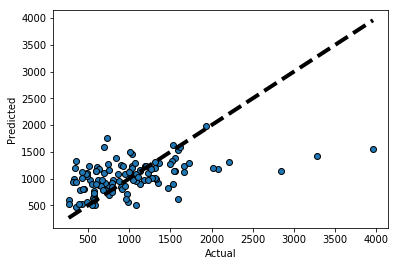

Prohibited weapons offences
Finished 10x10 fold cross validation in 1.4874477990088053 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.23833072334143637
instagrammers_ratio 0.18025382504796977
replyers_per_capita 0.14618333328002264
tl_tweeters 0.060553548043132135
Polr_Neg_A_ptweet 0.04707925060193635
Polr_Neg_N_ptweet 0.03848926246153035
Afternoon_pcapita 0.038086287100912074
Prof_exists_pcapita 0.03719352471595789
Polr_Neg_M_ptweet 0.03420300710061766
Night_pcapita 0.03336335540417457
Polr_Neg_E_ptweet 0.03050707470161601
link_tweets_ratio 0.030431733190252042
ja_tweeters 0.020227354925691
Evening_pcapita 0.019823671910382746
Morning_pcapita 0.019816882234027767
in_tweeters 0.017867115490832537
tr_tweeters 0.007590050449508078
R2: 0.4011317752548649
RMSE: 115.43283944442724
MAPE: 85.2640466613434
Mean APE Baseline: 126.65985983247047


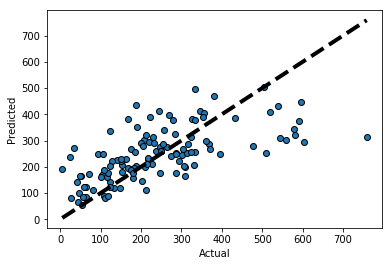

,LGA,DERIVED Assault - domestic violence,DERIVED Assault - non-domestic violence,DERIVED Fraud,DERIVED Sexual Offences,DERIVED Malicious damage to property,DERIVED Prohibited weapons offences
0,Albury,460.492151,479.687299,597.126277,232.736361,1198.431476,287.769059
1,Armidale Regional,420.357968,480.609739,470.905714,207.087775,1303.460314,254.049982
2,Ballina,333.636394,355.749432,423.237205,191.491919,783.486398,178.931007
3,Bathurst Regional,418.572858,445.896215,450.091941,199.589092,983.868232,209.911832
4,Bayside,229.092626,247.917806,683.055424,119.045626,501.887807,86.871954
5,Bega Valley,438.566572,473.258632,434.821585,222.484672,950.535577,206.483913
6,Bellingen,613.240748,505.137153,457.778466,172.920312,1215.537922,248.478014
7,Berrigan,659.976635,623.508895,373.309029,274.844264,1583.837133,376.958482
8,Blacktown,374.281366,299.946046,730.761094,101.647632,563.379673,120.819112
9,Bland,553.283858,447.203040,294.264000,278.907077,1266.084595,469.365100


In [21]:
output = pd.DataFrame()
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = derived_features.tolist()
    y_cols = ['LGA',crime]
    X = all_features[X_cols]
    y = targets[y_cols]
    preds, importants = repeat_rfr_cv(X, y, folds=10, reps=10)
    end = timer()
    print('Finished 10x10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    preds = preds[['LGA','predicted']]
    preds.columns = ['LGA', 'DERIVED '+crime]
    if len(output.columns) == 0:
        output = output.append(preds)
    else:
        output = output.merge(preds, on='LGA')
output

In [156]:
output.to_csv("../../data/clean/17_derived_features_rfr_preds.csv",index=False)

In [163]:
# Keep a dataframe of mapes scores for each named "model"
mapes_df = pd.DataFrame()
np.random.seed(2018)
for crime in crimes:
    mapes_df[crime] = score_crime(all_features, targets, derived_features.tolist(), crime, n=10, random_state=None)
mapes_df['Model'] = 'Twitter 17'
mapes_df

,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,63.519147,52.876352,37.504062,38.733050,43.846850,85.656082,Twitter 17
1,63.833634,52.169094,37.961316,39.617005,43.824780,93.310076,Twitter 17
2,63.414832,53.515264,36.565550,39.586618,45.541112,77.964455,Twitter 17
3,63.240987,52.816067,37.778670,38.599294,44.569459,88.224119,Twitter 17
4,65.760595,54.846647,37.067355,39.429393,43.862715,77.767953,Twitter 17
5,61.643559,51.879299,37.269887,40.026161,44.182624,83.980315,Twitter 17
6,62.666272,53.277343,37.479244,39.779402,43.820047,84.158241,Twitter 17
7,64.795530,53.114584,36.893294,39.062487,42.549839,87.965723,Twitter 17
8,64.330115,54.300533,37.285949,39.234602,44.424187,83.920630,Twitter 17
9,64.151547,54.561679,35.645601,38.951997,43.965863,95.254162,Twitter 17


RFR ENSEMBLE 17 DERIVED FEATURES PLUS MNB/TFIDF.
Assault - domestic violence
Finished 10x10 fold cross validation in 1.6377217300469056 seconds
MOST IMPORTANT FEATURES:
Assault - domestic violence P4 0.20453466743261728
instagrammers_ratio 0.07287641159967241
Polr_Neg_N_ptweet 0.07115416667849181
replyers_per_capita 0.07093231282875861
Assault - domestic violence P2 0.05383003439332332
Morning_pcapita 0.047761324212541006
Assault - domestic violence P0 0.04299360928930313
Afternoon_pcapita 0.039604226228207015
link_tweets_ratio 0.03795284301499468
total_tweeters 0.03742970717366628
Polr_Neg_E_ptweet 0.03740464850611008
Evening_pcapita 0.035331339327682044
Assault - domestic violence P1 0.035211503110959934
Prof_exists_pcapita 0.03518751783085632
tl_tweeters 0.03182580786121173
Assault - domestic violence P3 0.03178186425134038
Night_pcapita 0.030955137697163453
Polr_Neg_M_ptweet 0.030858394754014012
Polr_Neg_A_ptweet 0.02281715337463874
in_tweeters 0.02011576721898533
R2: 0.04900540115

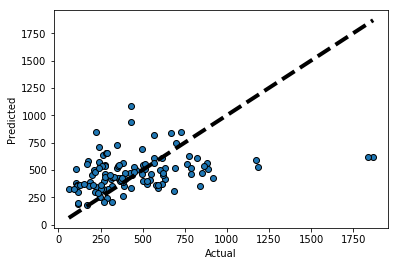

Assault - non-domestic violence
Finished 10x10 fold cross validation in 1.6854734000517055 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.10888602370277148
Morning_pcapita 0.09565548871009963
Afternoon_pcapita 0.07708915249541484
instagrammers_ratio 0.07411816794419201
Assault - non-domestic violence P3 0.06413690119864984
Evening_pcapita 0.05656729476629644
replyers_per_capita 0.051102670320789766
Night_pcapita 0.05106984110467523
ja_tweeters 0.04631030125020541
Polr_Neg_N_ptweet 0.03952330496516753
Assault - non-domestic violence P0 0.03697354909677765
tl_tweeters 0.03506498231440939
Assault - non-domestic violence P1 0.03492158331366153
link_tweets_ratio 0.032282996197547466
in_tweeters 0.03184069482554667
Assault - non-domestic violence P4 0.03139819550853494
Assault - non-domestic violence P2 0.029496350794407714
Polr_Neg_M_ptweet 0.027690193528968763
Polr_Neg_E_ptweet 0.025063841750521513
Prof_exists_pcapita 0.023159346763207526
R2: 0.09305605116925919
RMSE: 231.51798894552127

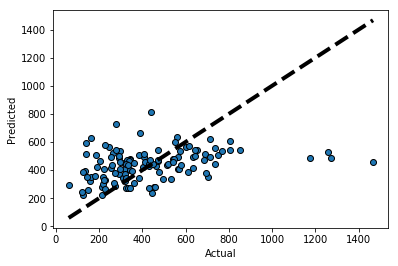

Fraud
Finished 10x10 fold cross validation in 1.667965336004272 seconds
MOST IMPORTANT FEATURES:
ja_tweeters 0.20597671579345223
total_tweeters 0.1763021438984317
instagrammers_ratio 0.1346008286234817
Fraud P4 0.0746197412533076
Fraud P1 0.045606888461560725
replyers_per_capita 0.038321522086940375
Polr_Neg_E_ptweet 0.03671479887986164
tl_tweeters 0.035975888565555315
tr_tweeters 0.03564252936989239
Polr_Neg_A_ptweet 0.027687625850871023
link_tweets_ratio 0.024842419974011005
in_tweeters 0.021465171933236455
Polr_Neg_M_ptweet 0.019683091673712447
Afternoon_pcapita 0.017639961452567375
Polr_Neg_N_ptweet 0.01583237186250896
Prof_exists_pcapita 0.015279537568174484
Fraud P2 0.014011192401583576
Fraud P0 0.013967315103891688
Morning_pcapita 0.012814757739411516
Fraud P3 0.012766632234258038
R2: 0.24052079199328136
RMSE: 252.0358937361518
MAPE: 37.34365419048822
Mean APE Baseline: 50.56437861497196


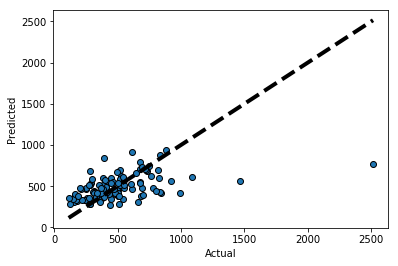

Sexual Offences
Finished 10x10 fold cross validation in 1.6026433180086315 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.13921009075806112
Sexual Offences P3 0.10694319087264073
Sexual Offences P0 0.09626752567604362
replyers_per_capita 0.08710585379835507
Night_pcapita 0.06364499447863872
total_tweeters 0.04563596036081607
Polr_Neg_N_ptweet 0.043690557697389505
Sexual Offences P4 0.043623891683147994
Polr_Neg_E_ptweet 0.042864750781077564
Evening_pcapita 0.037865238299900426
Prof_exists_pcapita 0.0357668246431694
Morning_pcapita 0.03526268543315245
Sexual Offences P2 0.03341171121179208
link_tweets_ratio 0.0326956073392627
Afternoon_pcapita 0.028431112494079643
Sexual Offences P1 0.02840046648355813
Polr_Neg_M_ptweet 0.0271232021002786
Polr_Neg_A_ptweet 0.025169400907488787
tl_tweeters 0.019273074606615353
in_tweeters 0.012818357675425981
R2: 0.28175188718592037
RMSE: 79.11472627589981
MAPE: 38.730004441941226
Mean APE Baseline: 53.08218065832499


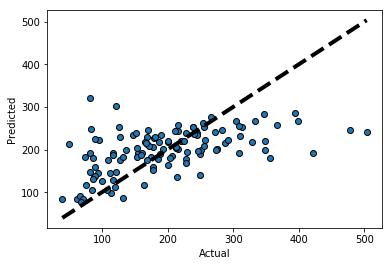

Malicious damage to property
Finished 10x10 fold cross validation in 1.5796134939882904 seconds
MOST IMPORTANT FEATURES:
Malicious damage to property P4 0.16762594408038897
instagrammers_ratio 0.11489678733482861
Morning_pcapita 0.07595591095528428
Polr_Neg_N_ptweet 0.06433103900993381
Malicious damage to property P0 0.06007866107049874
Afternoon_pcapita 0.051601765118956366
replyers_per_capita 0.050484008789268016
Night_pcapita 0.05044871321222647
Malicious damage to property P3 0.04311708477786853
Evening_pcapita 0.04287214027192892
tl_tweeters 0.036621505504284835
link_tweets_ratio 0.03354431770005375
Prof_exists_pcapita 0.029682766386874795
Malicious damage to property P1 0.028400372035402913
Polr_Neg_M_ptweet 0.028276336539305034
Malicious damage to property P2 0.026273337139017597
Polr_Neg_E_ptweet 0.025243786287981126
total_tweeters 0.02285405740557258
Polr_Neg_A_ptweet 0.021845570108097363
in_tweeters 0.017420946200246794
R2: 0.22123302953813895
RMSE: 505.54262687236735
MAPE: 4

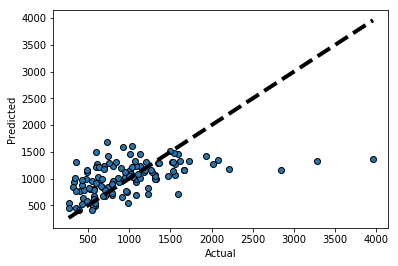

Prohibited weapons offences
Finished 10x10 fold cross validation in 1.5305078999954276 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.19494379531660666
instagrammers_ratio 0.12617468505992868
Prohibited weapons offences P4 0.12088987259407764
replyers_per_capita 0.10281712732583168
Prohibited weapons offences P0 0.04748425989189269
tl_tweeters 0.04583312488546332
Night_pcapita 0.0336511615185351
Polr_Neg_A_ptweet 0.03125171982381301
Afternoon_pcapita 0.03124604234274605
Prohibited weapons offences P2 0.030992513442198253
Polr_Neg_N_ptweet 0.028782599777615155
Prohibited weapons offences P3 0.027396270614878683
Prof_exists_pcapita 0.027377350516028964
Prohibited weapons offences P1 0.025387714549323967
Polr_Neg_M_ptweet 0.022673586679007905
Polr_Neg_E_ptweet 0.02188930720159958
link_tweets_ratio 0.019842021884731362
Morning_pcapita 0.016195075580157644
Evening_pcapita 0.014721865135749114
ja_tweeters 0.014025080618459631
R2: 0.3482227458534016
RMSE: 120.42408177961188
MAPE: 84.483838

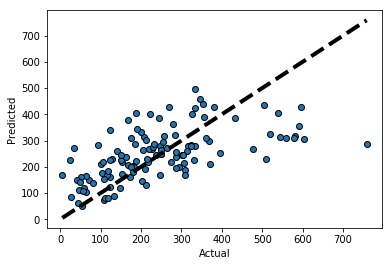

,LGA,Twitter17+TFIDF Assault - domestic violence,Twitter17+TFIDF Assault - non-domestic violence,Twitter17+TFIDF Fraud,Twitter17+TFIDF Sexual Offences,Twitter17+TFIDF Malicious damage to property,Twitter17+TFIDF Prohibited weapons offences
0,Albury,408.274830,492.396997,618.895414,243.633028,1068.011905,280.919038
1,Armidale Regional,547.428167,539.880310,412.849511,219.393407,1175.448532,236.995714
2,Ballina,306.197794,408.431398,457.805113,192.630588,703.072223,172.733453
3,Bathurst Regional,454.926295,429.866115,378.400992,216.661536,1124.895312,268.952884
4,Bayside,210.571781,287.078488,678.647682,105.045458,491.080104,73.057985
5,Bega Valley,414.719737,476.778342,442.119991,203.195951,955.111445,218.390557
6,Bellingen,544.156136,524.140545,466.553945,191.229215,1274.249165,283.660237
7,Berrigan,578.542531,591.729363,387.533133,321.499921,1230.301916,361.474898
8,Blacktown,330.975119,282.443114,701.678275,116.374568,553.585045,119.030306
9,Bland,724.353572,447.707439,322.430470,256.578328,1427.269201,429.619981


In [22]:
output = pd.DataFrame()
print('RFR ENSEMBLE 17 DERIVED FEATURES PLUS MNB/TFIDF.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = derived_features.tolist() + [crime+' P'+str(i) for i in np.arange(5)]
    y_cols = ['LGA',crime]
    X = all_features[X_cols]
    y = targets[y_cols]
    preds, importants = repeat_rfr_cv(X, y, folds=10, reps=10)
    end = timer()
    print('Finished 10x10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    preds = preds[['LGA','predicted']]
    preds.columns = ['LGA', 'Twitter17+TFIDF '+crime]
    if len(output.columns) == 0:
        output = output.append(preds)
    else:
        output = output.merge(preds, on='LGA')
output

In [165]:
output.to_csv("../../data/clean/ensemble_twitter17_tfidf_rfr_preds.csv",index=False)

In [25]:
# Append to mapes_df:
t18_df = pd.DataFrame()
np.random.seed(2018)
for crime in crimes:
    xcols = derived_features.tolist() + [crime+' P'+str(i) for i in np.arange(5)]
    t18_df[crime] = score_crime(all_features, targets, xcols, crime,
                                n=10, random_state=None)
t18_df['Model'] = 'T17 + TF-IDF'
mapes_df=mapes_df.append(t18_df, ignore_index=True)
mapes_df

NameError: name 'mapes_df' is not defined

RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF AND OPAL.
Assault - domestic violence
Finished 10x10 fold cross validation in 1.6209878679946996 seconds
MOST IMPORTANT FEATURES:
Assault - domestic violence P4 0.19860162169882364
Polr_Neg_N_ptweet 0.07348683469287418
instagrammers_ratio 0.07158645239920658
replyers_per_capita 0.06244874977537362
Assault - domestic violence P2 0.053304280735437026
Morning_pcapita 0.046578404295366485
Assault - domestic violence P0 0.042082464262871086
link_tweets_ratio 0.03754935010462654
Afternoon_pcapita 0.03738669126448094
Polr_Neg_E_ptweet 0.037371716701144135
Assault - domestic violence P1 0.037044607518731704
total_tweeters 0.0362875715602034
Prof_exists_pcapita 0.034612869628771574
Polr_Neg_M_ptweet 0.0322579859002452
Evening_pcapita 0.03101920567484786
tl_tweeters 0.030776166011590896
Night_pcapita 0.03009651560120796
Assault - domestic violence P3 0.029645773794517917
Opal Assault - domestic violence 0.02627589328218789
Polr_Neg_A_ptweet 0.023379381

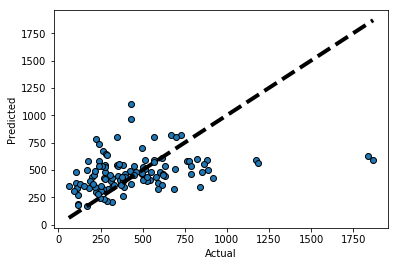

Assault - non-domestic violence
Finished 10x10 fold cross validation in 1.626764370012097 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.10902209702517758
Morning_pcapita 0.09565150623612659
Afternoon_pcapita 0.07465841348551536
instagrammers_ratio 0.07333323324353985
Assault - non-domestic violence P3 0.062438539378934156
Evening_pcapita 0.05765074286018547
Night_pcapita 0.05241176066848378
replyers_per_capita 0.04962882037660197
ja_tweeters 0.045302587623246626
Polr_Neg_N_ptweet 0.038534371733491515
Assault - non-domestic violence P0 0.03661336610033844
Assault - non-domestic violence P1 0.03637758947622336
tl_tweeters 0.0329681991329337
in_tweeters 0.03214019233881188
Assault - non-domestic violence P4 0.03134982091439153
link_tweets_ratio 0.030793422552220506
Assault - non-domestic violence P2 0.029322732491025256
Polr_Neg_M_ptweet 0.02707232724193211
Polr_Neg_E_ptweet 0.02522691015656317
Prof_exists_pcapita 0.023778832819631925
R2: 0.09731683050194073
RMSE: 230.9735184942449
MA

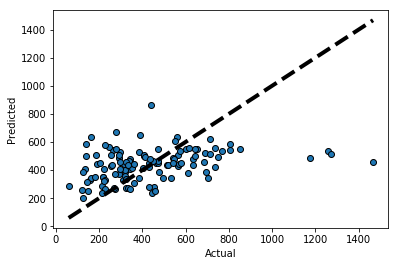

Fraud
Finished 10x10 fold cross validation in 1.6971699619898573 seconds
MOST IMPORTANT FEATURES:
ja_tweeters 0.1908329612347232
total_tweeters 0.17798228667246563
instagrammers_ratio 0.10216780038060014
Opal Fraud 0.08557530409700641
Fraud P4 0.06318432146138349
Fraud P1 0.04321871874794846
tl_tweeters 0.03387439295091314
replyers_per_capita 0.03343692304528692
tr_tweeters 0.03090012072308386
Polr_Neg_E_ptweet 0.029238285091848996
Polr_Neg_A_ptweet 0.027098800520433064
in_tweeters 0.02520451248084638
link_tweets_ratio 0.022245019047731466
Polr_Neg_M_ptweet 0.01880339763495896
Afternoon_pcapita 0.017754022211869173
Prof_exists_pcapita 0.015175870302687354
Polr_Neg_N_ptweet 0.015175857633031642
Fraud P0 0.013463262036776568
Fraud P2 0.01289709629784438
Morning_pcapita 0.011531342084035574
R2: 0.23520097443777743
RMSE: 252.91705364352697
MAPE: 37.209496778237416
Mean APE Baseline: 50.56437861497196


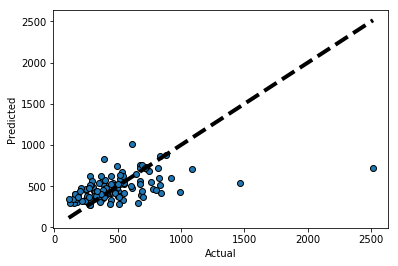

Sexual Offences
Finished 10x10 fold cross validation in 1.6689459590124898 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.1373649279343881
Sexual Offences P3 0.10698559741194269
Sexual Offences P0 0.0947195312083546
replyers_per_capita 0.0845362007327202
Night_pcapita 0.06426136542230759
total_tweeters 0.045625843917983924
Polr_Neg_E_ptweet 0.04362945064274873
Polr_Neg_N_ptweet 0.043359036089588375
Sexual Offences P4 0.04279829805768034
Evening_pcapita 0.035943824220561756
Prof_exists_pcapita 0.034277530913151125
Morning_pcapita 0.03397843449185526
link_tweets_ratio 0.03348357762020069
Sexual Offences P2 0.03264252426012308
Sexual Offences P1 0.028044270419286726
Afternoon_pcapita 0.027727618324409634
Polr_Neg_M_ptweet 0.026390215563733683
Polr_Neg_A_ptweet 0.025008503576694503
tl_tweeters 0.018948414402748102
in_tweeters 0.012782087926397675
R2: 0.2849127930409969
RMSE: 78.94044809875813
MAPE: 39.115062588987435
Mean APE Baseline: 53.08218065832499


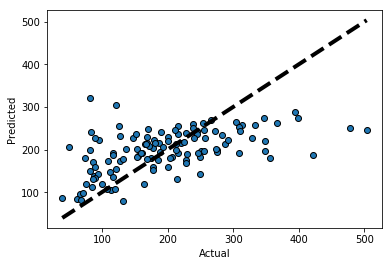

Malicious damage to property
Finished 10x10 fold cross validation in 1.6317104320041835 seconds
MOST IMPORTANT FEATURES:
Malicious damage to property P4 0.16600437433046372
instagrammers_ratio 0.1157356662060416
Morning_pcapita 0.07449314112984656
Polr_Neg_N_ptweet 0.06190003561560398
Malicious damage to property P0 0.05970863595867662
Afternoon_pcapita 0.0501937107549335
Night_pcapita 0.050001972776172056
replyers_per_capita 0.04947803408549631
Malicious damage to property P3 0.04570998467687636
Evening_pcapita 0.042594842486587896
tl_tweeters 0.035541369933448134
link_tweets_ratio 0.03376472866862927
Prof_exists_pcapita 0.03147889506297419
Polr_Neg_M_ptweet 0.02726954324974788
Malicious damage to property P1 0.026810899148110395
Malicious damage to property P2 0.026566058583876874
Polr_Neg_E_ptweet 0.02392923592247071
total_tweeters 0.02244794934293235
Polr_Neg_A_ptweet 0.020847617556383837
in_tweeters 0.015827923835352118
R2: 0.24463750654763383
RMSE: 497.8880781371417
MAPE: 41.5389

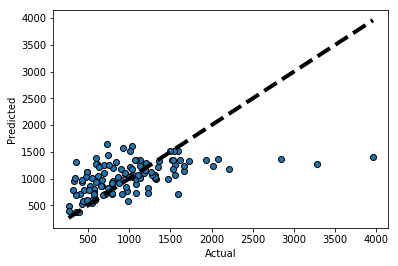

Prohibited weapons offences
Finished 10x10 fold cross validation in 1.640293666976504 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.19220848346067285
Prohibited weapons offences P4 0.11682044272947487
instagrammers_ratio 0.1112477907376048
replyers_per_capita 0.08089295530986822
Opal Prohibited weapons offences 0.06064677415816166
Prohibited weapons offences P0 0.04515305981076035
tl_tweeters 0.045140833065621944
Polr_Neg_A_ptweet 0.03140260071952228
Afternoon_pcapita 0.030280028443502298
Night_pcapita 0.0294823285462657
Prohibited weapons offences P2 0.029338214159553372
Polr_Neg_N_ptweet 0.028773023643579154
Prof_exists_pcapita 0.027081151972015268
Prohibited weapons offences P3 0.026187623761378676
Prohibited weapons offences P1 0.026031347538695068
Polr_Neg_M_ptweet 0.02331532416603666
Polr_Neg_E_ptweet 0.021887294935652175
link_tweets_ratio 0.01848185917853042
Evening_pcapita 0.0141157200392907
Morning_pcapita 0.013130958293822752
R2: 0.3478565283901017
RMSE: 120.4579086800889

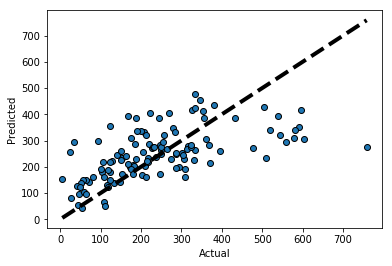

,LGA,Twitter18+Opal Assault - domestic violence,Twitter18+Opal Assault - non-domestic violence,Twitter18+Opal Fraud,Twitter18+Opal Sexual Offences,Twitter18+Opal Malicious damage to property,Twitter18+Opal Prohibited weapons offences
0,Albury,404.639010,504.743361,625.106069,235.390290,1075.508340,279.939792
1,Armidale Regional,526.704035,549.283401,416.684295,215.268850,1172.538950,247.026173
2,Ballina,312.187819,387.908243,443.377881,185.411556,715.833181,173.338531
3,Bathurst Regional,472.828172,448.300483,394.468839,230.077897,1099.398048,272.497864
4,Bayside,204.918618,266.404904,708.768986,111.691521,611.139193,66.355452
5,Bega Valley,403.321750,478.087447,436.968817,200.943308,965.220618,232.196018
6,Bellingen,541.463533,544.933855,449.979607,191.128564,1277.230015,299.392038
7,Berrigan,577.842051,583.183883,399.284974,321.271251,1250.534030,349.569248
8,Blacktown,382.737259,277.699837,724.474133,118.567205,583.804249,140.641513
9,Bland,798.031803,440.932634,311.047702,255.996054,1439.885411,435.516656


In [26]:
output = pd.DataFrame()
print('RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF AND OPAL.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = derived_features.tolist() + [crime+' P'+str(i) for i in np.arange(5)] + ['Opal '+crime]
    y_cols = ['LGA',crime]
    X = all_features[X_cols]
    y = targets[y_cols]
    preds, importants = repeat_rfr_cv(X, y, folds=10, reps=10)
    end = timer()
    print('Finished 10x10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    preds = preds[['LGA','predicted']]
    preds.columns = ['LGA', 'Twitter18+Opal '+crime]
    if len(output.columns) == 0:
        output = output.append(preds)
    else:
        output = output.merge(preds, on='LGA')
output

In [168]:
output.to_csv("../../data/clean/ensemble_twitter18_opal_rfr_preds.csv",index=False)

In [169]:
# Append to mapes_df:
opal_19_df = pd.DataFrame()
np.random.seed(2018)
for crime in crimes:
    opal_19_df[crime] = score_crime(all_features, targets, derived_features.tolist()+['TF-IDF','Opal'], crime,
                                n=10, random_state=None)
opal_19_df['Model'] = 'T18 + Opal'
mapes_df=mapes_df.append(opal_19_df, ignore_index=True)
mapes_df

,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,63.519147,52.876352,37.504062,38.733050,43.846850,85.656082,Twitter 17
1,63.833634,52.169094,37.961316,39.617005,43.824780,93.310076,Twitter 17
2,63.414832,53.515264,36.565550,39.586618,45.541112,77.964455,Twitter 17
3,63.240987,52.816067,37.778670,38.599294,44.569459,88.224119,Twitter 17
4,65.760595,54.846647,37.067355,39.429393,43.862715,77.767953,Twitter 17
5,61.643559,51.879299,37.269887,40.026161,44.182624,83.980315,Twitter 17
6,62.666272,53.277343,37.479244,39.779402,43.820047,84.158241,Twitter 17
7,64.795530,53.114584,36.893294,39.062487,42.549839,87.965723,Twitter 17
8,64.330115,54.300533,37.285949,39.234602,44.424187,83.920630,Twitter 17
9,64.151547,54.561679,35.645601,38.951997,43.965863,95.254162,Twitter 17


## Compare to Demographic Features before Ensembling

RFR 12 DEMOGRAPHIC FEATURES ONLY.
Assault - domestic violence
Finished 10x10 fold cross validation in 1.4013254339806736 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.4814071301197838
Pop_density 0.11128192726728245
Per_immi 0.06936824993224351
Median_mortgage_repay_monthly_G02 0.05463109782431637
Num_sep_males 0.04861938836734428
Per_no_relg 0.0415829584986466
Per_Voc 0.03929201466682201
Median_rent_weekly_G02 0.03842898798094466
Median_tot_hhd_inc_weekly_G02 0.03819335652222905
Percent_Unem_loyment_P_G40 0.03350732082036558
Per_english 0.02280829702865615
Median_age_persons_G02 0.02087927097136554
R2: 0.5462357129989494
RMSE: 197.55964176514922
MAPE: 28.11101228556023
Mean APE Baseline: 72.09140356370095


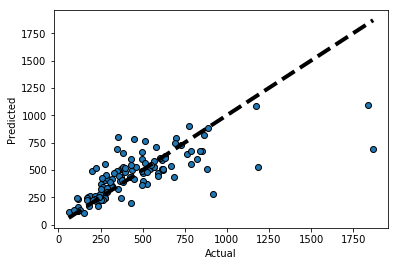

Assault - non-domestic violence
Finished 10x10 fold cross validation in 1.3887606690404937 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.4049906666322539
Pop_density 0.15831633369873108
Percent_Unem_loyment_P_G40 0.07940381425283202
Median_rent_weekly_G02 0.07626102154101627
Per_no_relg 0.0699790539565967
Median_mortgage_repay_monthly_G02 0.05312451779087855
Per_Voc 0.03690831610971317
Num_sep_males 0.030165165854764225
Per_immi 0.025122348405584662
Median_tot_hhd_inc_weekly_G02 0.022296887697398567
Median_age_persons_G02 0.021887532607844182
Per_english 0.021544341452386626
R2: 0.4868879917253732
RMSE: 174.14082869433886
MAPE: 29.548296152470023
Mean APE Baseline: 59.83267716016895


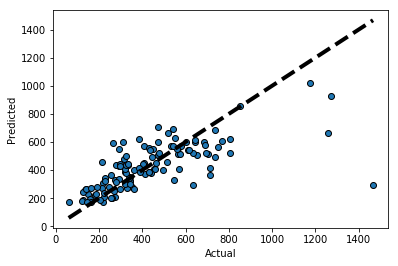

Fraud
Finished 10x10 fold cross validation in 1.4202376760076731 seconds
MOST IMPORTANT FEATURES:
Median_age_persons_G02 0.2333158370824497
Pop_density 0.22270199234428226
Per_lone_par 0.17421933527702835
Per_english 0.09885940689235684
Per_no_relg 0.06651845067719757
Percent_Unem_loyment_P_G40 0.04900436841439163
Num_sep_males 0.037706880809541675
Per_immi 0.035020223641810816
Median_rent_weekly_G02 0.024011628480102
Per_Voc 0.02351960488204054
Median_tot_hhd_inc_weekly_G02 0.022305365012195672
Median_mortgage_repay_monthly_G02 0.012816906486602948
R2: 0.41278453131354376
RMSE: 221.61706277456855
MAPE: 30.339898798858883
Mean APE Baseline: 50.56437861497196


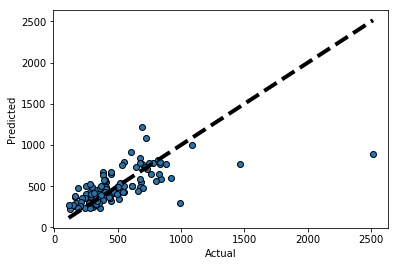

Sexual Offences
Finished 10x10 fold cross validation in 1.3737575649865903 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.3783894153523434
Median_mortgage_repay_monthly_G02 0.12257752513738358
Num_sep_males 0.10794758457145258
Median_rent_weekly_G02 0.10511084898797791
Per_english 0.04428753017580537
Per_immi 0.04407845508568578
Pop_density 0.038437433529931175
Per_no_relg 0.03741587827208618
Per_Voc 0.03231630680960569
Median_tot_hhd_inc_weekly_G02 0.0318563244672016
Median_age_persons_G02 0.028825114156859583
Percent_Unem_loyment_P_G40 0.028757583453667118
R2: 0.4923781362964963
RMSE: 66.51050459075466
MAPE: 27.496081238128873
Mean APE Baseline: 53.08218065832499


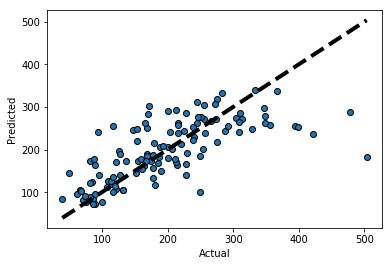

Malicious damage to property
Finished 10x10 fold cross validation in 1.3572284909896553 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.4652672316763987
Pop_density 0.11540482710173944
Median_rent_weekly_G02 0.08718713835007591
Median_mortgage_repay_monthly_G02 0.05646118735910946
Per_immi 0.04107804159738601
Num_sep_males 0.03970967182395507
Per_english 0.036353291729817785
Median_age_persons_G02 0.03561567056716352
Percent_Unem_loyment_P_G40 0.034823796137508814
Per_Voc 0.034113510804559856
Per_no_relg 0.03354111531970635
Median_tot_hhd_inc_weekly_G02 0.02044451753257906
R2: 0.5332688724061512
RMSE: 391.3698826089006
MAPE: 26.193108793396924
Mean APE Baseline: 53.423893616506355


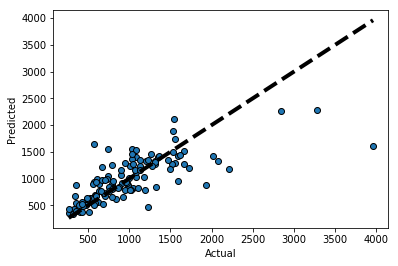

Prohibited weapons offences
Finished 10x10 fold cross validation in 1.4035679739899933 seconds
MOST IMPORTANT FEATURES:
Median_rent_weekly_G02 0.36160397871328603
Pop_density 0.14391409767573823
Per_Voc 0.09170276808245506
Per_english 0.08494543808919762
Num_sep_males 0.08281434656578197
Median_mortgage_repay_monthly_G02 0.044004134080813676
Per_immi 0.043522669405392296
Median_age_persons_G02 0.040830422596196646
Per_lone_par 0.03442423661973667
Median_tot_hhd_inc_weekly_G02 0.03162981708506216
Percent_Unem_loyment_P_G40 0.02168605311409167
Per_no_relg 0.018922037972247962
R2: 0.5791535593816391
RMSE: 96.76662020871329
MAPE: 38.022793293627544
Mean APE Baseline: 126.65985983247047


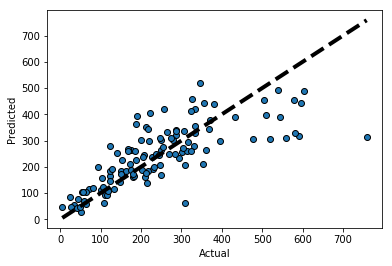

,LGA,Demog Assault - domestic violence,Demog Assault - non-domestic violence,Demog Fraud,Demog Sexual Offences,Demog Malicious damage to property,Demog Prohibited weapons offences
0,Albury,507.507758,560.871935,482.211216,239.320020,1322.419533,293.533925
1,Armidale Regional,475.600738,510.416623,587.230474,212.405353,1172.083131,319.869710
2,Ballina,373.051906,383.980975,506.660829,173.788384,903.939738,175.356858
3,Bathurst Regional,499.309642,453.589350,550.302072,206.158966,1027.503422,237.658453
4,Bayside,351.343739,330.605339,713.934960,122.748395,701.223226,114.453799
5,Bega Valley,364.933806,323.871440,326.003945,220.130656,830.092896,224.091917
6,Bellingen,411.662560,591.123292,499.242619,255.676978,999.434313,198.117783
7,Berrigan,251.699361,266.601170,365.730349,172.876657,710.996978,302.728329
8,Blacktown,468.692615,405.198140,818.254981,162.456859,879.437817,143.848681
9,Bland,687.970510,481.338036,324.363824,262.464065,1550.841139,438.070224


In [27]:
output = pd.DataFrame()
print('RFR 12 DEMOGRAPHIC FEATURES ONLY.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = demog_features.tolist()
    y_cols = ['LGA',crime]
    X = all_features[X_cols]
    y = targets[y_cols]
    preds, importants = repeat_rfr_cv(X, y, folds=10, reps=10)
    end = timer()
    print('Finished 10x10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    preds = preds[['LGA','predicted']]
    preds.columns = ['LGA', 'Demog '+crime]
    if len(output.columns) == 0:
        output = output.append(preds)
    else:
        output = output.merge(preds, on='LGA')
output

In [171]:
output.to_csv("../../data/clean/demographics_rfr_preds.csv",index=False)

In [172]:
# Append to mapes_df
dem_12_df = pd.DataFrame()
np.random.seed(2018)
for crime in crimes:
    dem_12_df[crime] = score_crime(all_features, targets, demog_features.tolist(), crime,
                                n=10, random_state=None)
dem_12_df['Model'] = 'Demographic 12'
mapes_df=mapes_df.append(dem_12_df, ignore_index=True)
mapes_df

,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,63.519147,52.876352,37.504062,38.733050,43.846850,85.656082,Twitter 17
1,63.833634,52.169094,37.961316,39.617005,43.824780,93.310076,Twitter 17
2,63.414832,53.515264,36.565550,39.586618,45.541112,77.964455,Twitter 17
3,63.240987,52.816067,37.778670,38.599294,44.569459,88.224119,Twitter 17
4,65.760595,54.846647,37.067355,39.429393,43.862715,77.767953,Twitter 17
5,61.643559,51.879299,37.269887,40.026161,44.182624,83.980315,Twitter 17
6,62.666272,53.277343,37.479244,39.779402,43.820047,84.158241,Twitter 17
7,64.795530,53.114584,36.893294,39.062487,42.549839,87.965723,Twitter 17
8,64.330115,54.300533,37.285949,39.234602,44.424187,83.920630,Twitter 17
9,64.151547,54.561679,35.645601,38.951997,43.965863,95.254162,Twitter 17


Combine all derived features, demographic features, and tf-idf prediction into an ensamble model.

RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF PLUS OPAL PLUS 12 DEMOGRAPHIC FEATURES.
Assault - domestic violence
Finished 10x10 fold cross validation in 1.925768417015206 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.4550415847853701
Pop_density 0.09067448962366087
Per_immi 0.04863275850131447
Median_mortgage_repay_monthly_G02 0.0475525980035627
Num_sep_males 0.03450265119409682
Polr_Neg_N_ptweet 0.030645966783716953
Median_tot_hhd_inc_weekly_G02 0.026106942813817743
Per_no_relg 0.02562352122258971
Median_rent_weekly_G02 0.024583424825869928
Per_Voc 0.021638395824075958
Percent_Unem_loyment_P_G40 0.017189785683126294
Assault - domestic violence P2 0.015355379884371674
Assault - domestic violence P4 0.013588739083740344
instagrammers_ratio 0.013471612102193557
Assault - domestic violence P1 0.012018579970688005
Per_english 0.010333774825109616
link_tweets_ratio 0.010202793217003212
total_tweeters 0.009025177358615464
Polr_Neg_A_ptweet 0.008334672599135886
replyers_per_capita 0.00823597

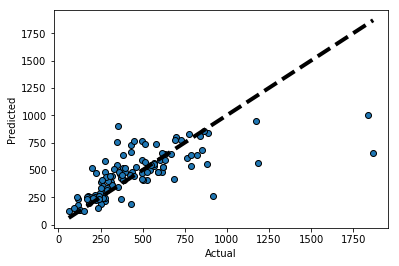

Assault - non-domestic violence
Finished 10x10 fold cross validation in 1.8892529780277982 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.3578068970995078
Pop_density 0.12467642830389072
Percent_Unem_loyment_P_G40 0.06985064176441987
Median_rent_weekly_G02 0.053849779088302095
Median_mortgage_repay_monthly_G02 0.039496638862563646
total_tweeters 0.03563746542558268
Per_no_relg 0.0334314360922626
Afternoon_pcapita 0.02283522236876803
Per_Voc 0.019971423496369704
Num_sep_males 0.018426352050290064
ja_tweeters 0.018098214063931167
Per_immi 0.01596230101629588
Assault - non-domestic violence P1 0.012801213165595713
Median_tot_hhd_inc_weekly_G02 0.011890825234118664
tl_tweeters 0.011554627219061819
Night_pcapita 0.01153806499297515
Assault - non-domestic violence P2 0.011324309535944073
replyers_per_capita 0.010949734863627056
Morning_pcapita 0.010540154976530259
instagrammers_ratio 0.010463103796436272
R2: 0.47782159094730814
RMSE: 175.67257731924698
MAPE: 31.392648249642303
Mean APE Base

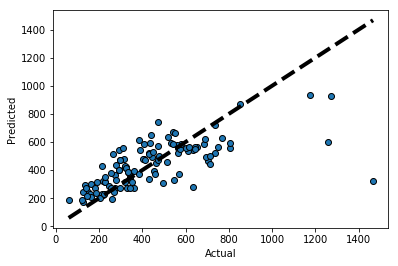

Fraud
Finished 10x10 fold cross validation in 1.9621758899884298 seconds
MOST IMPORTANT FEATURES:
Median_age_persons_G02 0.2032416885018265
Pop_density 0.15964461131268803
Per_lone_par 0.11383244247513728
Per_english 0.07429290911902099
total_tweeters 0.0722751678803678
ja_tweeters 0.0517484396762007
Per_no_relg 0.03218498100320913
Percent_Unem_loyment_P_G40 0.02961661389956294
tl_tweeters 0.02173276511183296
Polr_Neg_E_ptweet 0.018304662572187463
Fraud P1 0.017195325398197056
Fraud P4 0.016961341421408507
replyers_per_capita 0.014783561135530155
Polr_Neg_A_ptweet 0.014619814530830196
Per_immi 0.01458851619635761
Num_sep_males 0.01305870828053495
tr_tweeters 0.011910782727214518
instagrammers_ratio 0.010025544382428331
Median_rent_weekly_G02 0.00987732000174604
in_tweeters 0.009374281435329188
R2: 0.3808669563217256
RMSE: 227.56027113372048
MAPE: 30.086232563451613
Mean APE Baseline: 50.56437861497196


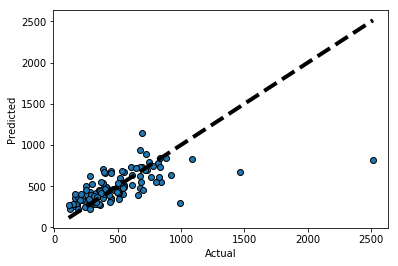

Sexual Offences
Finished 10x10 fold cross validation in 1.8655605699750595 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.32773480984233117
Median_mortgage_repay_monthly_G02 0.09977381039223725
Median_rent_weekly_G02 0.08762256054647688
Num_sep_males 0.08179645635271807
Sexual Offences P3 0.06808236295150248
Per_immi 0.026073460646697248
Polr_Neg_N_ptweet 0.018670433472471448
Polr_Neg_M_ptweet 0.01810713377662562
Sexual Offences P4 0.0167007226303285
Median_tot_hhd_inc_weekly_G02 0.01650564988516403
Percent_Unem_loyment_P_G40 0.015094806927888723
Pop_density 0.015085772993843054
Per_english 0.014143600034666002
Per_no_relg 0.013849576324894499
Sexual Offences P2 0.013649154366661845
link_tweets_ratio 0.013533793875738566
Median_age_persons_G02 0.013020708627672978
Polr_Neg_E_ptweet 0.01282546698733416
Per_Voc 0.012557785781449352
instagrammers_ratio 0.01218447462697615
R2: 0.5246008993290965
RMSE: 64.36492402586283
MAPE: 26.823106787295366
Mean APE Baseline: 53.08218065832499


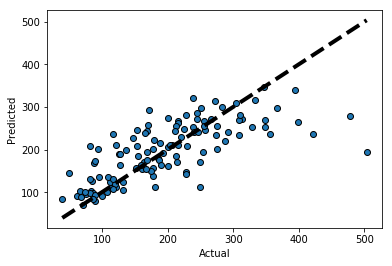

Malicious damage to property
Finished 10x10 fold cross validation in 1.8122403639717959 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.4427664946979251
Pop_density 0.09438826464719031
Median_rent_weekly_G02 0.06937541976906918
Median_mortgage_repay_monthly_G02 0.051399560639529884
Per_immi 0.02361065424587573
Percent_Unem_loyment_P_G40 0.022053393147674072
Num_sep_males 0.021546896422158335
Malicious damage to property P3 0.019934597707872682
Per_english 0.019091042835297445
Malicious damage to property P4 0.018043091313533693
Median_age_persons_G02 0.016045780034681243
Per_no_relg 0.015960767634140345
instagrammers_ratio 0.015247604309574584
Per_Voc 0.014023624963649648
Polr_Neg_N_ptweet 0.012478886918098255
total_tweeters 0.012408172680793608
Afternoon_pcapita 0.011812595855153336
replyers_per_capita 0.011679935616726983
Polr_Neg_M_ptweet 0.010623404083140192
Malicious damage to property P2 0.01036418575705329
R2: 0.5276208241872635
RMSE: 393.73080155735636
MAPE: 28.21652993536779
M

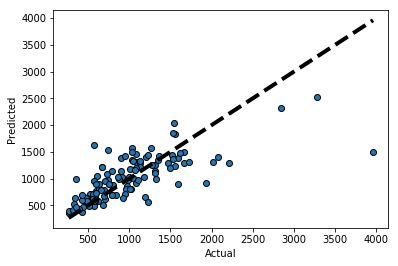

Prohibited weapons offences
Finished 10x10 fold cross validation in 1.7922484680311754 seconds
MOST IMPORTANT FEATURES:
Median_rent_weekly_G02 0.34347058575811434
Pop_density 0.11749291686271816
Per_Voc 0.06353950949864692
Num_sep_males 0.06314255069637649
Per_english 0.06269380442955846
Median_mortgage_repay_monthly_G02 0.031576052078547835
instagrammers_ratio 0.03142420259379941
Per_immi 0.025600279003493605
Median_age_persons_G02 0.0231138850242023
total_tweeters 0.021774687899307164
Median_tot_hhd_inc_weekly_G02 0.01821800659355719
Per_lone_par 0.018104160505210236
tl_tweeters 0.011858022518087399
Night_pcapita 0.011630026395920553
Prohibited weapons offences P2 0.01144387614038067
Prof_exists_pcapita 0.01108514404647315
Percent_Unem_loyment_P_G40 0.010950133492970332
Polr_Neg_N_ptweet 0.010140944237185283
Opal Prohibited weapons offences 0.00844068298762229
Polr_Neg_E_ptweet 0.008347465096953314
R2: 0.5680920912614897
RMSE: 98.0300720155294
MAPE: 41.40864376733644
Mean APE Baselin

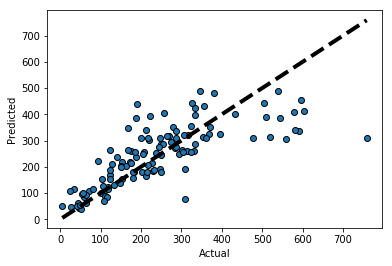

,LGA,ENSEMBLE31 Assault - domestic violence,ENSEMBLE31 Assault - non-domestic violence,ENSEMBLE31 Fraud,ENSEMBLE31 Sexual Offences,ENSEMBLE31 Malicious damage to property,ENSEMBLE31 Prohibited weapons offences
0,Albury,503.469535,560.823044,521.939439,266.899105,1264.387102,321.980115
1,Armidale Regional,490.905500,562.631398,555.448510,229.796072,1298.181960,310.288994
2,Ballina,387.601563,422.224952,462.335818,184.652964,868.345361,154.270473
3,Bathurst Regional,481.385039,447.946031,552.778130,205.339077,1022.881668,216.225440
4,Bayside,365.021650,364.722509,694.205828,126.807659,655.337606,109.201645
5,Bega Valley,386.297553,352.801274,359.857359,209.255821,865.607715,218.861941
6,Bellingen,477.558113,516.297600,496.970916,236.539407,1048.538148,223.246575
7,Berrigan,261.514486,268.701280,356.341237,207.836531,797.156119,352.509854
8,Blacktown,477.413421,392.026378,781.006862,171.612404,976.946250,139.152447
9,Bland,754.637959,477.122163,292.909968,261.762216,1543.698452,481.673514


In [31]:
output = pd.DataFrame()
print('RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF PLUS OPAL PLUS 12 DEMOGRAPHIC FEATURES.')
for crime in crimes:
    print(crime)
    start = timer()
    mnb_cols = [crime+' P'+str(i) for i in np.arange(5)]
    X_cols = demog_features.tolist() + derived_features.tolist() + mnb_cols + ['Opal '+crime]
    y_cols = ['LGA',crime]
    X = all_features[X_cols]
    y = targets[y_cols]
    preds, importants = repeat_rfr_cv(X, y, folds=10, reps=10)
    end = timer()
    print('Finished 10x10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    preds = preds[['LGA','predicted']]
    preds.columns = ['LGA', 'ENSEMBLE31 '+crime]
    if len(output.columns) == 0:
        output = output.append(preds)
    else:
        output = output.merge(preds, on='LGA')
output

In [174]:
output.to_csv("../../data/clean/ensemble_31_features_rfr_preds.csv",index=False)

In [175]:
# Append to mapes_df
all_31_df = pd.DataFrame()
flist = demog_features.tolist() + derived_features.tolist() + ['TF-IDF', 'Opal']
np.random.seed(2018)
for crime in crimes:
    all_31_df[crime] = score_crime(all_features, targets, flist, crime,
                                n=10, random_state=None)
all_31_df['Model'] = 'All 31'
mapes_df=mapes_df.append(all_31_df, ignore_index=True)
mapes_df

,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,63.519147,52.876352,37.504062,38.733050,43.846850,85.656082,Twitter 17
1,63.833634,52.169094,37.961316,39.617005,43.824780,93.310076,Twitter 17
2,63.414832,53.515264,36.565550,39.586618,45.541112,77.964455,Twitter 17
3,63.240987,52.816067,37.778670,38.599294,44.569459,88.224119,Twitter 17
4,65.760595,54.846647,37.067355,39.429393,43.862715,77.767953,Twitter 17
5,61.643559,51.879299,37.269887,40.026161,44.182624,83.980315,Twitter 17
6,62.666272,53.277343,37.479244,39.779402,43.820047,84.158241,Twitter 17
7,64.795530,53.114584,36.893294,39.062487,42.549839,87.965723,Twitter 17
8,64.330115,54.300533,37.285949,39.234602,44.424187,83.920630,Twitter 17
9,64.151547,54.561679,35.645601,38.951997,43.965863,95.254162,Twitter 17


In [176]:
#We need a baseline as well to compare
baseline_df = pd.DataFrame(columns=crimes)
for n in np.arange(10):
    baseline_df.loc[n] = np.zeros(len(crimes))
    for crime in crimes:
        baseline_df.loc[n][crime] = mape(targets[crime],np.mean(targets[crime]))
baseline_df['Model'] = 'Mean Baseline'
mapes_df=mapes_df.append(baseline_df, ignore_index=True)
mapes_df

,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences,Model
0,63.519147,52.876352,37.504062,38.733050,43.846850,85.656082,Twitter 17
1,63.833634,52.169094,37.961316,39.617005,43.824780,93.310076,Twitter 17
2,63.414832,53.515264,36.565550,39.586618,45.541112,77.964455,Twitter 17
3,63.240987,52.816067,37.778670,38.599294,44.569459,88.224119,Twitter 17
4,65.760595,54.846647,37.067355,39.429393,43.862715,77.767953,Twitter 17
5,61.643559,51.879299,37.269887,40.026161,44.182624,83.980315,Twitter 17
6,62.666272,53.277343,37.479244,39.779402,43.820047,84.158241,Twitter 17
7,64.795530,53.114584,36.893294,39.062487,42.549839,87.965723,Twitter 17
8,64.330115,54.300533,37.285949,39.234602,44.424187,83.920630,Twitter 17
9,64.151547,54.561679,35.645601,38.951997,43.965863,95.254162,Twitter 17


Ensembling improves 2 crimes and makes 4 worse on MAPE, although there is very little difference on most crimes. Starting with demographics, try forward feature selection, keeping track of mean MAPE across all 6 crimes.

In [44]:
np.random.seed(2018)
demog_mmape = mmape_score(all_features, targets, demog_features.tolist())
print('Mean MAPE score for 12 demographic features',demog_mmape)
# Append a pseudo-feature for TF-IDF score. Ugly but necessary.
remaining = demog_features.tolist() + derived_features.tolist() + ['P0','P1','P2','P3','P4','Opal']
selected = []
mmapes = []
while len(remaining) > 14:
    start = timer()
    min_score = 1e+10
    for feat in remaining:
        fscore, sigma = mmape_score(all_features, targets, selected + [feat])
        if fscore < min_score:
            min_score = fscore
            best_sigma = sigma
            best_feat = feat
    remaining.remove(best_feat)
    selected.append(best_feat)
    mmapes.append((min_score, best_sigma))
    end = timer()
    print('Selected', best_feat, 'with MMAPE', mmapes[-1], 'in', end-start,'seconds.')

Mean MAPE score for 12 demographic features (31.734470346754932, 0.25391775765697727)
Selected Pop_density with MMAPE (47.37495772915571, 0.419623977777489) in 88.80688168102643 seconds.
Selected Per_lone_par with MMAPE (33.70111694509095, 0.40749477859655225) in 90.97986799600767 seconds.
Selected Median_age_persons_G02 with MMAPE (32.153626387719996, 0.095454605333896) in 92.29610926401801 seconds.
Selected Median_rent_weekly_G02 with MMAPE (30.768230282892954, 0.5501087328647226) in 91.20919166697422 seconds.
Selected tr_tweeters with MMAPE (30.444740258577582, 0.5670128834785181) in 88.43150757299736 seconds.
Selected Median_mortgage_repay_monthly_G02 with MMAPE (30.415350531243924, 0.3610597097103478) in 87.59173627797281 seconds.
Selected Per_english with MMAPE (30.592767018056186, 0.3362884253777381) in 84.88560264499392 seconds.
Selected Per_Voc with MMAPE (30.432162155465278, 0.6574310062153383) in 85.05407920299331 seconds.
Selected Polr_Neg_E_ptweet with MMAPE (30.8909806994

MNB Ensembling does not result in either MNB or Opal features being picked in best model, hence no point in further investigating this without optimising those models first.